In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#importing file
data = pd.read_csv('day.csv')
#overview of the data
data.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [3]:
#checking min, max and mean of the columns
data.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.995890   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.000339   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.690411    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.462641    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [4]:
#checking nulls and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### Removing unnecessary columns

In [5]:
data.drop(['instant','dteday','casual','registered'],axis=1,inplace=True) #removing the following since we have alternate columns covering the same information

In [6]:
data.head() #data after dropping columns

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        1           1           2  14.110847   
1       1   0     1        0        2           1           2  14.902598   
2       1   0     1        0        3           1           1   8.050924   
3       1   0     1        0        4           1           1   8.200000   
4       1   0     1        0        5           1           1   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

<Figure size 1440x1080 with 0 Axes>

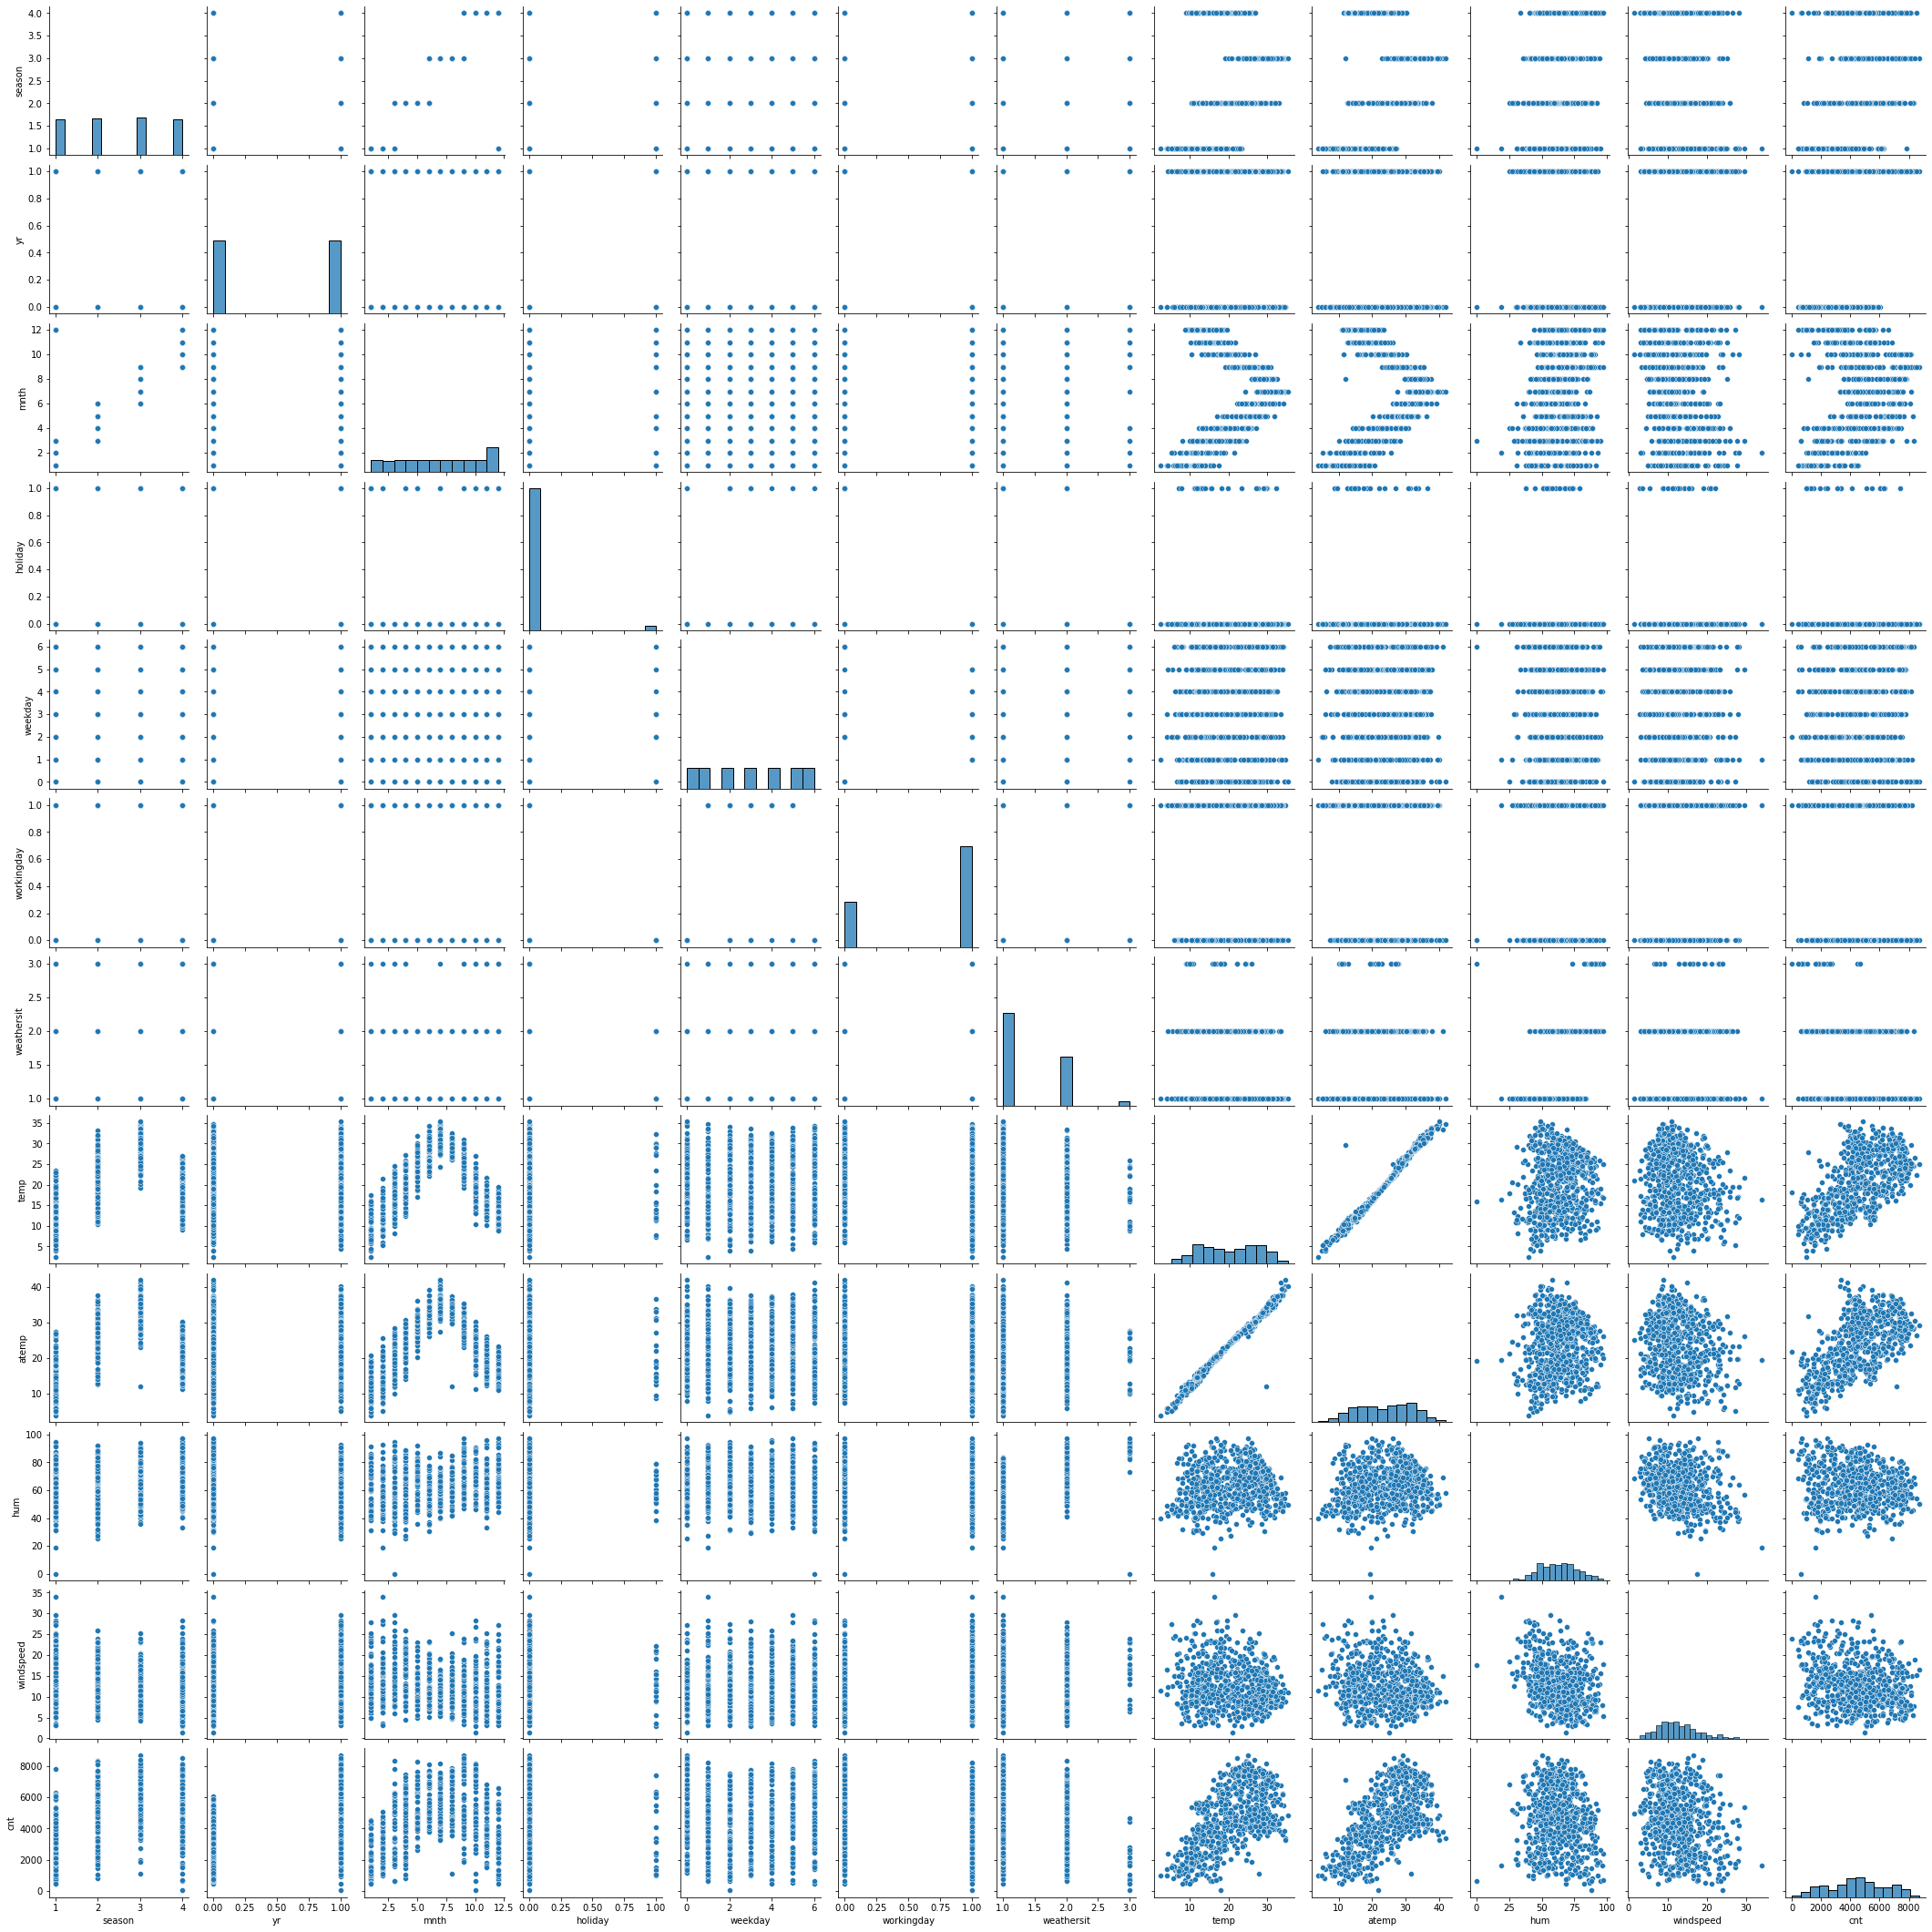

In [7]:
#visualizing the data using pairplot
plt.figure(figsize=(20,15))
sns.pairplot(data)
plt.show()

Temp and aTemp seems to have a high correlation therefore there must be a linear relationship.

In [8]:
#Also season, month and weekdays are not supposed to be Numerical therefore updating them
data.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)
data.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'},inplace = True)
data.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'},inplace = True)
data.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

In [9]:
#updating datatype
data['season']=data['season'].astype('category')
data['weathersit']=data['weathersit'].astype('category')
data['mnth']=data['mnth'].astype('category')
data['weekday']=data['weekday'].astype('category')

In [10]:
#checking correlation between the data
data_corr = data.corr()
data_corr

yr   holiday  workingday      temp     atemp       hum  \
yr          1.000000  0.008195   -0.011852  0.048789  0.047215 -0.112547   
holiday     0.008195  1.000000   -0.257009 -0.028764 -0.032703 -0.015662   
workingday -0.011852 -0.257009    1.000000  0.002044  0.010657  0.053770   
temp        0.048789 -0.028764    0.002044  1.000000  0.991696  0.128565   
atemp       0.047215 -0.032703    0.010657  0.991696  1.000000  0.141512   
hum        -0.112547 -0.015662    0.053770  0.128565  0.141512  1.000000   
windspeed  -0.011624  0.006257   -0.002453 -0.158186 -0.183876 -0.248506   
cnt         0.569728 -0.068764   -0.027640  0.627044  0.630685 -0.098543   

            windspeed       cnt  
yr          -0.011624  0.569728  
holiday      0.006257 -0.068764  
workingday  -0.002453 -0.027640  
temp        -0.158186  0.627044  
atemp       -0.183876  0.630685  
hum         -0.248506 -0.098543  
windspeed    1.000000 -0.235132  
cnt         -0.235132  1.000000

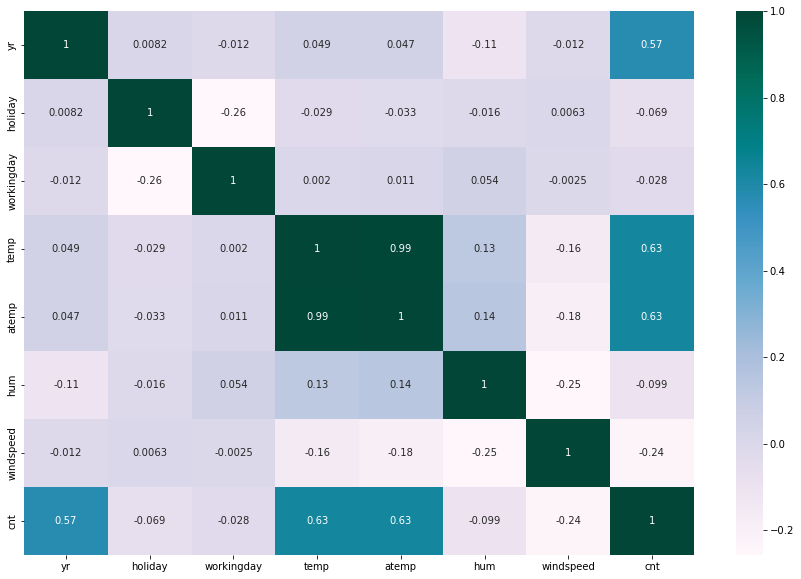

In [11]:
plt.figure(figsize=(15,10))
sns.heatmap(data_corr,cmap='PuBuGn',annot=True)
plt.show()

As per previous pairplot here as well it is comfirmed with heatmap that temp and atemp have a high correlation.

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

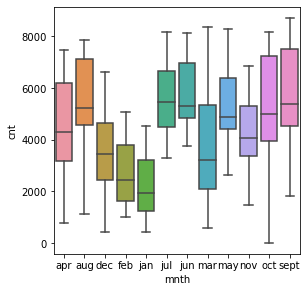

In [12]:
#now visualizing the categorical data
plt.figure(figsize=(15,10))
plt.subplot(2,3,3)
sns.boxplot(x='mnth',y='cnt',data= data)


We can see above that from Jun - Oct demand is higher tham other months.

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

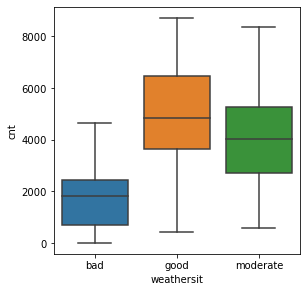

In [13]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,6)
sns.boxplot(x='weathersit',y='cnt',data= data)

Demand is higher when the weather conditions are good.

<AxesSubplot:xlabel='season', ylabel='cnt'>

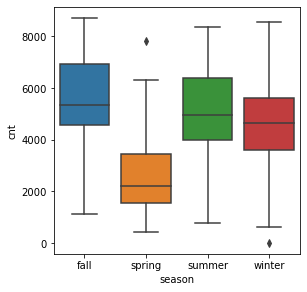

In [14]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.boxplot(x='season',y='cnt',data= data)

Demand is higher in summer and mostly in the fall

<AxesSubplot:xlabel='workingday', ylabel='cnt'>

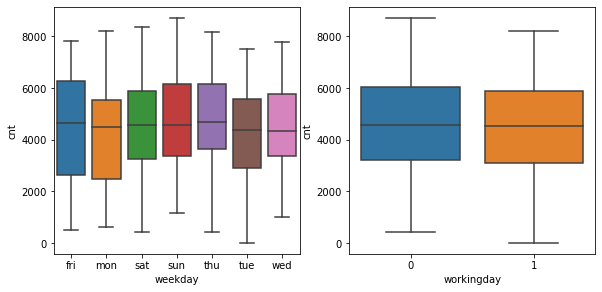

In [15]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,4)
sns.boxplot(x='weekday',y='cnt',data=data)
plt.subplot(2,3,5)
sns.boxplot(x='workingday',y='cnt',data=data)

There is not much variance in demand in terms of weekdays, mean is almost similar.

In [16]:
#creating dummies for the data now
data = pd.get_dummies(data= data,columns=["season","mnth","weekday"],drop_first=True)
data = pd.get_dummies(data= data,columns=["weathersit"])

In [17]:
data.head()

yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
0   0        0           1  14.110847  18.18125  80.5833  10.749882   985   
1   0        0           1  14.902598  17.68695  69.6087  16.652113   801   
2   0        0           1   8.050924   9.47025  43.7273  16.636703  1349   
3   0        0           1   8.200000  10.60610  59.0435  10.739832  1562   
4   0        0           1   9.305237  11.46350  43.6957  12.522300  1600   

   season_spring  season_summer  ...  mnth_sept  weekday_mon  weekday_sat  \
0              1              0  ...          0            1            0   
1              1              0  ...          0            0            0   
2              1              0  ...          0            0            0   
3              1              0  ...          0            0            0   
4              1              0  ...          0            0            0   

   weekday_sun  weekday_thu  weekday_tue  weekday_wed  weathersit_bad  \
0            0            0            0            0               0   
1            0            0            1            0               0   
2            0            0            0            1               0   
3            0            1            0            0               0   
4            0            0            0            0               0   

   weathersit_good  weathersit_moderate  
0                0                    1  
1                0                    1  
2                1                    0  
3                1                    0  
4                1                    0  

[5 rows x 31 columns]

In [18]:
#splitting data into train and test
#target variable
y=data.pop('cnt')

#independent variables
X=data

#splitting with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [19]:
# scaling continuous variables
cont_vars = ['temp','atemp','hum','windspeed']
scaler = MinMaxScaler()
X_train[cont_vars] = scaler.fit_transform(X_train[cont_vars])

In [20]:
X_train.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  511.000000  511.000000  511.000000  511.000000  511.000000  511.000000   
mean     0.520548    0.027397    0.698630    0.550874    0.526518    0.654174   
std      0.500067    0.163398    0.459303    0.227231    0.212976    0.143648   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.354221    0.353207    0.544598   
50%      1.000000    0.000000    1.000000    0.575304    0.563297    0.659940   
75%      1.000000    0.000000    1.000000    0.745079    0.698389    0.756977   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        windspeed  season_spring  season_summer  season_winter  ...  \
count  511.000000     511.000000     511.000000     511.000000  ...   
mean     0.414873       0.230920       0.258317       0.250489  ...   
std      0.185619       0.421834       0.438138       0.433719  ...   
min      0.000000       0.000000       0.000000       0.000000  ...   
25%      0.281934       0.000000       0.000000       0.000000  ...   
50%      0.384732       0.000000       0.000000       0.000000  ...   
75%      0.526481       0.000000       1.000000       0.500000  ...   
max      1.000000       1.000000       1.000000       1.000000  ...   

       mnth_sept  weekday_mon  weekday_sat  weekday_sun  weekday_thu  \
count  511.00000   511.000000   511.000000   511.000000   511.000000   
mean     0.09002     0.148728     0.142857     0.133072     0.135029   
std      0.28649     0.356169     0.350270     0.339986     0.342090   
min      0.00000     0.000000     0.000000     0.000000     0.000000   
25%      0.00000     0.000000     0.000000     0.000000     0.000000   
50%      0.00000     0.000000     0.000000     0.000000     0.000000   
75%      0.00000     0.000000     0.000000     0.000000     0.000000   
max      1.00000     1.000000     1.000000     1.000000     1.000000   

       weekday_tue  weekday_wed  weathersit_bad  weathersit_good  \
count   511.000000   511.000000      511.000000       511.000000   
mean      0.156556     0.133072        0.029354         0.624266   
std       0.363738     0.339986        0.168963         0.484786   
min       0.000000     0.000000        0.000000         0.000000   
25%       0.000000     0.000000        0.000000         0.000000   
50%       0.000000     0.000000        0.000000         1.000000   
75%       0.000000     0.000000        0.000000         1.000000   
max       1.000000     1.000000        1.000000         1.000000   

       weathersit_moderate  
count           511.000000  
mean              0.346380  
std               0.476282  
min               0.000000  
25%               0.000000  
50%               0.000000  
75%               1.000000  
max               1.000000  

[8 rows x 30 columns]

Min is 0 and Max is 1.

In [21]:
#building model now
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [22]:
rfe_model = RFE(lin_reg, n_features_to_select=15)
rfe_model.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [23]:
#data selected by RFE
list(zip(X_train.columns,rfe_model.support_,rfe_model.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 13),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 8),
 ('season_winter', True, 1),
 ('mnth_aug', False, 12),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 9),
 ('mnth_jan', False, 15),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 10),
 ('mnth_mar', True, 1),
 ('mnth_may', False, 2),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 4),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 5),
 ('weekday_sat', False, 14),
 ('weekday_sun', False, 11),
 ('weekday_thu', False, 16),
 ('weekday_tue', False, 7),
 ('weekday_wed', False, 6),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', False, 3)]

In [24]:
#creating function to calculate VIF
def cal_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [25]:
#creating function to build a model
def create_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [26]:
#removing features that were not selected by RFE
X_train.columns[~rfe_model.support_]

Index(['workingday', 'season_summer', 'mnth_aug', 'mnth_feb', 'mnth_jan',
       'mnth_jun', 'mnth_may', 'mnth_oct', 'weekday_mon', 'weekday_sat',
       'weekday_sun', 'weekday_thu', 'weekday_tue', 'weekday_wed',
       'weathersit_moderate'],
      dtype='object')

In [27]:
# comsidering 15 columns that are supported by RFE for regression
X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']]


## Creating Model 1

In [28]:
cols1 = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

In [29]:
create_model(cols1)
cal_vif(cols1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     165.0
Date:                Mon, 30 Jan 2023   Prob (F-statistic):          1.70e-181
Time:                        23:55:15   Log-Likelihood:                -4134.9
No. Observations:                 511   AIC:                             8302.
Df Residuals:                     495   BIC:                             8370.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2809.2461    

## Creating Model 2 (without Month Jan)

In [30]:
cols2 = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
create_model(cols2)
cal_vif(cols2)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     177.1
Date:                Mon, 30 Jan 2023   Prob (F-statistic):          1.35e-182
Time:                        23:55:16   Log-Likelihood:                -4135.0
No. Observations:                 511   AIC:                             8300.
Df Residuals:                     496   BIC:                             8363.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2792.2799    

## Creating Model 3(without variable hum)

In [32]:
cols3 = ['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
create_model(cols3)
cal_vif(cols3)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     183.6
Date:                Mon, 30 Jan 2023   Prob (F-statistic):          3.37e-180
Time:                        23:55:39   Log-Likelihood:                -4143.4
No. Observations:                 511   AIC:                             8315.
Df Residuals:                     497   BIC:                             8374.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2004.0762    

## Creating Model 4(without month July and temp)

In [33]:
cols4 = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
create_model(cols4)
cal_vif(cols4)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     209.0
Date:                Mon, 30 Jan 2023   Prob (F-statistic):          8.20e-179
Time:                        23:55:43   Log-Likelihood:                -4152.2
No. Observations:                 511   AIC:                             8328.
Df Residuals:                     499   BIC:                             8379.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1779.2943    

## Creating Model 5(without variable holiday)

In [34]:
cols5 = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
create_model(cols5)
cal_vif(cols5)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     193.1
Date:                Mon, 30 Jan 2023   Prob (F-statistic):          1.51e-178
Time:                        23:55:47   Log-Likelihood:                -4150.1
No. Observations:                 511   AIC:                             8326.
Df Residuals:                     498   BIC:                             8381.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1845.8415    

## Creating Model 6(without workingday & summer; adding temp ; & replacing july)

In [35]:
cols6 = ['yr','season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate','temp']
create_model(cols6)
cal_vif(cols6)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     246.5
Date:                Mon, 30 Jan 2023   Prob (F-statistic):          9.73e-178
Time:                        23:55:51   Log-Likelihood:                -4160.4
No. Observations:                 511   AIC:                             8341.
Df Residuals:                     501   BIC:                             8383.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1740.7372    

In [36]:
#building final model with sklearn
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1
#Let us build the finalmodel using sklearn
#Build a model with above columns
lr = build_model_sk(X_train[cols6],y_train)
print(lr.intercept_,lr.coef_)

1740.7372440164272 [ 1994.67955569 -1167.70089558  -514.63181313   496.75430396
   465.92729708   190.37518346 -2256.10482681  -662.38986442
  3984.25555511]


### Residual Analysis Of Training Data

In [37]:
y_train_pred = lr.predict(X_train[cols6])

In [38]:
def plot_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Plotting Error Terms')
    plt.xlabel('Errors')

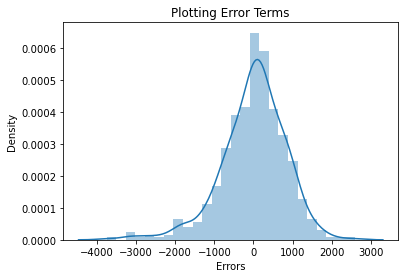

In [39]:
plot_dist(y_train, y_train_pred)

In [40]:
# r-squared value for train prediction
r2_score(y_train,y_train_pred)

0.8158045196281631

In [44]:
num_vars = ['temp','atemp','hum','windspeed']

#Test data transformation
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [45]:
cols6 = ['yr','season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate','temp']

#Predicting test data values
y_test_pred = lr.predict(X_test[cols6])

## Model Evaluation


In [46]:
y_pred=y_test_pred
r2_score(y_test, y_pred)

0.8127228702995222

Text(0, 0.5, 'y_pred')

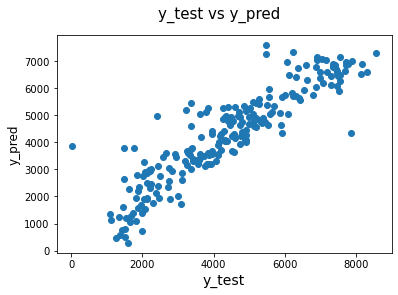

In [47]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 15)             
plt.xlabel('y_test', fontsize = 14)                          
plt.ylabel('y_pred', fontsize = 12) 

In [49]:
#building final model with RFE approach
cols6 = ['yr','season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate','temp']

lm = create_model(cols6)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     246.5
Date:                Tue, 31 Jan 2023   Prob (F-statistic):          9.73e-178
Time:                        00:02:34   Log-Likelihood:                -4160.4
No. Observations:                 511   AIC:                             8341.
Df Residuals:                     501   BIC:                             8383.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1740.7372    

Significant variables to predict the demand for shared bikes are Season, months(January, July, September, November, December), Year, Sunday, weathersit( Light Snow, Mist + Cloud, holiday, temp, hum, windspeed